# Laptop Price Prediction 



## Problem Statement: <br> 
### Predict laptop prices based on product name, processor, processor generation, operating system, ram, ssd, hdd, and display size. <br>
## Project Goals: <br>
 -  ### Uncover key factors influencing laptop pricing.
 -  ### Develop a precise price prediction model.

## Project Structure:

  -  ### 1  Data Preparation
  -  ### 2  Machine Learning
## Part 1: Data Preparation <br>
### Data Cleaning:

 - Fix erroneous columns which contains clutered data.
- Making data in proper structure.
- Remove rows with duplicated values.

### Data Validation:

- Ensure data quality and integrity.
- Data Analysis and Visualization (EDA).
- Explore data distributions, relationships and patterns.
- Identify potential predictors of price.

### Summary and Conclusion:
- Key insights of Exploratory data analysis.
 
 

## Part 2: Machine Learning <br>

### Model Building and Selection: <br>
-  Experiment with various regression algorithm.
-  Select the model with the best performance on evaluation metrics.
### Model Evaluation: <br>
- Employ appropriate metrics to assess model performance.
- R-squared (R²): Measures the proportion of variance explained by the model.
- Mean Absolute Error (MAE): Average absolute difference between actual and predicted prices.
### Model Selection: <br>
- Choose the model with the optimal balance of accuracy and interpretability.
- Consider factors like model complexity, prediction accuracy, and practical implications.
### Final Model: <br>
- Train the selected model on the entire dataset.
- Use the final model for future price predictions.

In [1]:
#importing all necessary library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading dataset
df = pd.read_csv("D:\Project\laptop\laptops.csv")

In [3]:
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


In [4]:
df.shape

(984, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 92.4+ KB


## Data cleaning:

Dropping unwanted columns 

In [6]:
df.drop(columns=["Unnamed: 0","img_link","rating","no_of_ratings","no_of_reviews"],inplace= True)

Chaning this "Lenovo Intel Core i5 11th Gen" to "Lenovo"


In [7]:
df['name']= df['name'].apply(lambda x:" ".join(x.split()[:1]))

In [8]:
df['processor'].nunique()

59

There are 59 unique values in processor lets reduce this to main type of processor only 

In [9]:
from re import match

def clean_processor(processor):
   
    # Intel Core processors with generation
    match_result = match(r"^Intel Core (?P<core>i[3579]) Processor \((?P<gen>\d+)th Gen\)$", processor)
    if match_result:  # Check if there's a match
        return f"Intel Core {match_result.group('core')} ({match_result.group('gen')}th Gen)"

    # Other Intel processors
    elif match(r"^Intel (Celeron|Pentium) (Dual Core|Quad Core) Processor.*$", processor):
        return "Intel Core Other"

    # AMD processors with generation
    match_result = match(r"^AMD Ryzen (?P<core>3|5|7|9) (?P<cores>Dual|Quad|Hexa|Octa) Core Processor \((?P<gen>\d+)th Gen\)$", processor)
    if match_result:
        return f"AMD Ryzen {match_result.group('core')} ({match_result.group('cores')} Core) ({match_result.group('gen')}th Gen)"

    # Other AMD processors
    elif match(r"^AMD (Athlon|APU) Dual Core Processor.*$", processor):
        return "AMD Other"

    # Apple processors
    elif match(r"^Apple (M1|M2|M1 (Max|Pro)|M2 Pro) Processor$", processor):
        return processor

    # MediaTek processors
    elif match(r"^MediaTek .*Processor$", processor):
        return "MediaTek"

    # Other processors
    else:
        return "Other"

# Apply the function to the `processor` column
df["processor"] = df["processor"].apply(clean_processor)




Extracting generation from the Processor column 

In [10]:
# Extracting generation from processor column and storing in new column 
df['generation'] = df['processor'].str.extract(r'\((\d+)(?:th|rd|nd)? Gen\)', expand=False).fillna(0)

df_filtered = df[df['generation'] != 0]


In [11]:
df.head()

,name,price(in Rs.),processor,ram,os,storage,display(in inch),generation
0,Lenovo,62990,Intel Core i5 (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,11
1,Lenovo,37500,Intel Core i3 (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,11
2,ASUS,49990,Intel Core i5 (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,10
3,ASUS,33990,Intel Core i3 (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,10
4,Lenovo,18990,AMD Other,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,0


In [12]:
df['generation'] = df['generation'].astype('int64') #changing type of generation column from object to int

Simplfying the processor column more because there are still many category <br> 
Removing suffix like (11th gen) because it is already stored in genration column.

In [13]:
#taking only processor type like 'intel core i5','amd ryzen 9'
df['processor']= df['processor'].apply(lambda x:" ".join(x.split()[:3])) 

In [14]:
df['processor'].unique()

array(['Intel Core i5', 'Intel Core i3', 'AMD Other',
       'Apple M1 Processor', 'Intel Core Other', 'Other', 'Intel Core i7',
       'Apple M2 Processor', 'Intel Core i9', 'Apple M1 Max',
       'Apple M1 Pro', 'Apple M2 Pro', 'AMD Ryzen 9', 'AMD Ryzen 5',
       'AMD Ryzen 7', 'MediaTek'], dtype=object)

There are many details present in "ram" like "16 GB DDR4 RAM" we want only numeric value "16"

In [15]:
df['ram']= df['ram'].apply(lambda x:" ".join(x.split()[:1])).astype('int32')

There are many versions of operating system lets make it genric like Windows 11, 10 , 7, Mac

In [16]:
df['os'].unique()

array(['Windows 11 Operating System',
       '64 bit Windows 11 Operating System', 'DOS Operating System',
       'Mac OS Operating System', '64 bit Windows 10 Operating System',
       '32 bit Windows 11 Operating System', 'Chrome Operating System',
       '64 bit Chrome Operating System', 'Windows 10 Operating System',
       '64 bit DOS Operating System', '64 bit Windows 8 Operating System'],
      dtype=object)

In [17]:
def operating_system(os):
    if 'Windows 11' in os:
        return "Windows 11"
    elif 'Windows 10' in os:
        return 'Windows 10'
    elif 'Windows 8' in os:
        return 'Windows 8'
    elif 'Mac' in os:
        return 'Mac'
    else:
        return 'Other'


df['os'] = df['os'].apply(operating_system)




In [18]:
df['storage'].unique()

array(['512 GB SSD', '1 TB HDD|256 GB SSD', '256 GB SSD', '1 TB SSD',
       '2 TB SSD', '1 TB HDD|512 GB SSD', '1 TB HDD', '128 GB SSD',
       '256 GB HDD|256 GB SSD', '4 TB SSD', '512 GB HDD|512 GB SSD',
       '1 TB HDD|128 GB SSD',
       'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center',
       'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability',
       '2 TB HDD', '256 GB HDD'], dtype=object)

Droping 2 rows 595 & 698, contains unwanted information.

In [19]:
df.drop([698],inplace=True, axis= 0)
df.drop([595],inplace=True, axis= 0)

In [20]:
df['storage'].unique()

array(['512 GB SSD', '1 TB HDD|256 GB SSD', '256 GB SSD', '1 TB SSD',
       '2 TB SSD', '1 TB HDD|512 GB SSD', '1 TB HDD', '128 GB SSD',
       '256 GB HDD|256 GB SSD', '4 TB SSD', '512 GB HDD|512 GB SSD',
       '1 TB HDD|128 GB SSD', '2 TB HDD', '256 GB HDD'], dtype=object)

In [21]:
df['storage'].value_counts()

storage
512 GB SSD               575
1 TB SSD                 154
256 GB SSD               123
1 TB HDD|256 GB SSD       63
1 TB HDD                  33
2 TB SSD                  11
128 GB SSD                 8
1 TB HDD|512 GB SSD        4
512 GB HDD|512 GB SSD      3
1 TB HDD|128 GB SSD        3
256 GB HDD|256 GB SSD      2
4 TB SSD                   1
2 TB HDD                   1
256 GB HDD                 1
Name: count, dtype: int64

In [22]:
import re

ssd_num = []
ssd_unit = []
hdd_num = [] 
hdd_unit = []

for storage in df['storage']:
    # Extract SSD information
    ssd_matches = re.findall(r'(\d+) (GB|TB) SSD', storage)
    ssd_capacity_gb = sum(int(capacity) if unit == 'GB' else int(capacity) * 1024 for capacity, unit in ssd_matches)
    ssd_num.append(ssd_capacity_gb)
    ssd_unit.append('GB' if ssd_capacity_gb < 1024 else 'TB')

    # Extract HDD information
    hdd_matches = re.findall(r'(\d+) (GB|TB) HDD', storage)
    hdd_capacity_tb = sum(int(capacity) if unit == 'GB' else int(capacity) for capacity, unit in hdd_matches)
    hdd_num.append(hdd_capacity_tb)
    hdd_unit.append('TB' if hdd_capacity_tb > 0 else '')

df['ssd'] = ssd_num 
df['ssd_unit'] = ssd_unit
df['hdd'] = hdd_num
df['hdd_unit'] = hdd_unit




In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              982 non-null    object 
 1   price(in Rs.)     982 non-null    int64  
 2   processor         982 non-null    object 
 3   ram               982 non-null    int32  
 4   os                982 non-null    object 
 5   storage           982 non-null    object 
 6   display(in inch)  982 non-null    float64
 7   generation        982 non-null    int64  
 8   ssd               982 non-null    int64  
 9   ssd_unit          982 non-null    object 
 10  hdd               982 non-null    int64  
 11  hdd_unit          982 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 95.9+ KB


In [24]:
df.head()

,name,price(in Rs.),processor,ram,os,storage,display(in inch),generation,ssd,ssd_unit,hdd,hdd_unit
0,Lenovo,62990,Intel Core i5,16,Windows 11,512 GB SSD,15.6,11,512,GB,0,
1,Lenovo,37500,Intel Core i3,8,Windows 11,1 TB HDD|256 GB SSD,15.6,11,256,GB,1,TB
2,ASUS,49990,Intel Core i5,8,Windows 11,512 GB SSD,15.6,10,512,GB,0,
3,ASUS,33990,Intel Core i3,8,Windows 11,512 GB SSD,15.6,10,512,GB,0,
4,Lenovo,18990,AMD Other,4,Other,256 GB SSD,14.0,0,256,GB,0,


Dropping extra columns 

In [25]:
df.drop(columns=["ssd_unit","hdd_unit","storage"],inplace= True)

Renaming and chaning order of the column

In [26]:
#changing the sequence of the columns 
df = df[["name","os","processor","generation","ram","ssd","hdd","display(in inch)","price(in Rs.)"]] 

#renaming columns 
df.rename(columns={"display(in inch)":"display","price(in Rs.)" : "price"},inplace= True)

Checking null and duplicate values 

In [27]:
df.isnull().sum()

name          0
os            0
processor     0
generation    0
ram           0
ssd           0
hdd           0
display       0
price         0
dtype: int64

In [28]:
df.duplicated().sum()

235

There are duplicate rows in data which needs to be removed, if not it may effect the accuracy 

In [29]:
df.drop_duplicates(inplace= True)

In [30]:
df.duplicated().sum()

0

Converting all the categorical values into lowercase

In [31]:
df["name"] = df["name"].str.lower()
df["processor"] = df["processor"].str.lower()
df["os"] = df["os"].str.lower()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 983
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        747 non-null    object 
 1   os          747 non-null    object 
 2   processor   747 non-null    object 
 3   generation  747 non-null    int64  
 4   ram         747 non-null    int32  
 5   ssd         747 non-null    int64  
 6   hdd         747 non-null    int64  
 7   display     747 non-null    float64
 8   price       747 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 55.4+ KB


Data cleaning is done, all the values are sorted. <br>
Final dataset looks like this 

In [33]:
df.head()

,name,os,processor,generation,ram,ssd,hdd,display,price
0,lenovo,windows 11,intel core i5,11,16,512,0,15.6,62990
1,lenovo,windows 11,intel core i3,11,8,256,1,15.6,37500
2,asus,windows 11,intel core i5,10,8,512,0,15.6,49990
3,asus,windows 11,intel core i3,10,8,512,0,15.6,33990
4,lenovo,other,amd other,0,4,256,0,14.0,18990


In [34]:
df.to_csv("D:\ML_projects\Laptop_price\dataset\laptop_clean_data.csv",index=False)

Saving the clean part of data 

## Data validation <br>
- Checking data statistics
- Skewness of the data, outliers, correlation with primary columns. 
- Performing EDA 
- Plotting graphs for visuals 


In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [36]:
df= pd.read_csv("D:\ML_projects\Laptop_price\dataset\laptop_clean_data.csv")


In [37]:
df.head()

,name,os,processor,generation,ram,ssd,hdd,display,price
0,lenovo,windows 11,intel core i5,11,16,512,0,15.6,62990
1,lenovo,windows 11,intel core i3,11,8,256,1,15.6,37500
2,asus,windows 11,intel core i5,10,8,512,0,15.6,49990
3,asus,windows 11,intel core i3,10,8,512,0,15.6,33990
4,lenovo,other,amd other,0,4,256,0,14.0,18990


In [38]:
df.describe()

,generation,ram,ssd,hdd,display,price
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,6.775100,11.946452,569.574297,3.186078,15.137751,88547.483266
std,5.364991,6.108696,352.163510,36.161967,1.466134,61458.836302
min,0.000000,4.000000,0.000000,0.000000,11.600000,15990.000000
25%,0.000000,8.000000,512.000000,0.000000,14.000000,46990.000000
50%,10.000000,8.000000,512.000000,0.000000,15.600000,68290.000000
75%,11.000000,16.000000,512.000000,0.000000,15.600000,106910.500000
max,13.000000,32.000000,4096.000000,512.000000,35.000000,419990.000000


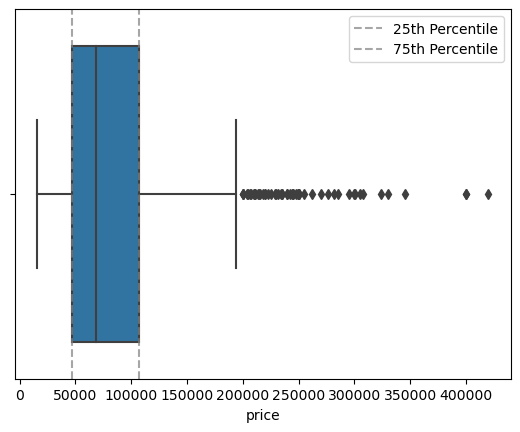

In [40]:
#plotting box plot to see the spread and outliers of the price
sns.boxplot(x=df['price'])

q25, q75 = df['price'].quantile([0.25, 0.75])

plt.axvline(q25, linestyle='--', color='gray', alpha=0.7, label='25th Percentile')
plt.axvline(q75, linestyle='--', color='gray', alpha=0.7, label='75th Percentile')

plt.legend()
plt.show()


<Axes: xlabel='price', ylabel='Count'>

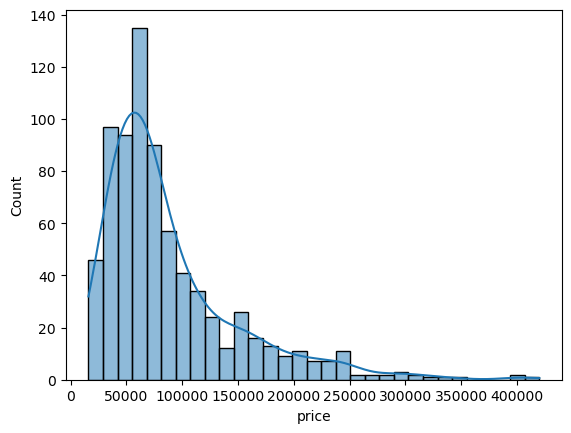

In [41]:
#ploting histogram with KDE
sns.histplot(df["price"], kde=True)

Most of the laptop are in price range of 40000 - 100000 <br>
very few laptops above 200000

<Axes: xlabel='name'>

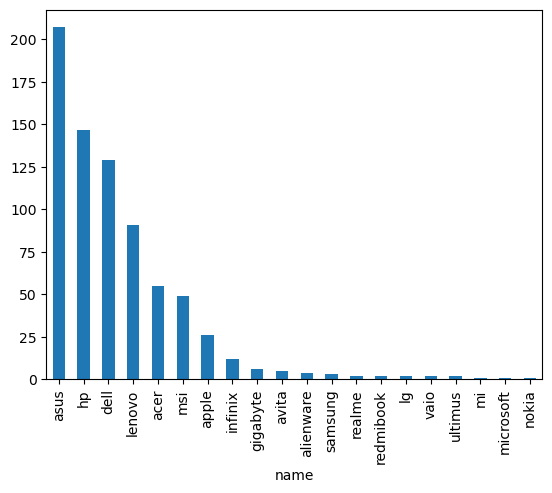

In [42]:
#checking the counts with respect to brand names
df['name'].value_counts().plot(kind='bar')

Asus, HP, Dell, Lenovo have more products in market than other brands. 
This could be due to price and features.

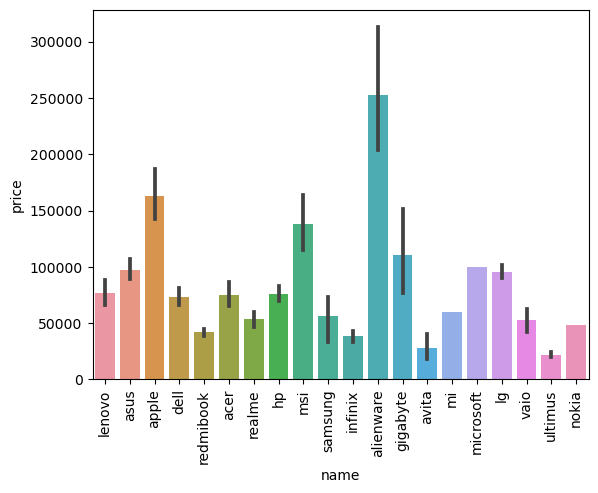

In [43]:
#comparing price with brands 
sns.barplot(x=df['name'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

Alienware and Apple are the 2 brands with most costly products 

<Axes: xlabel='processor'>

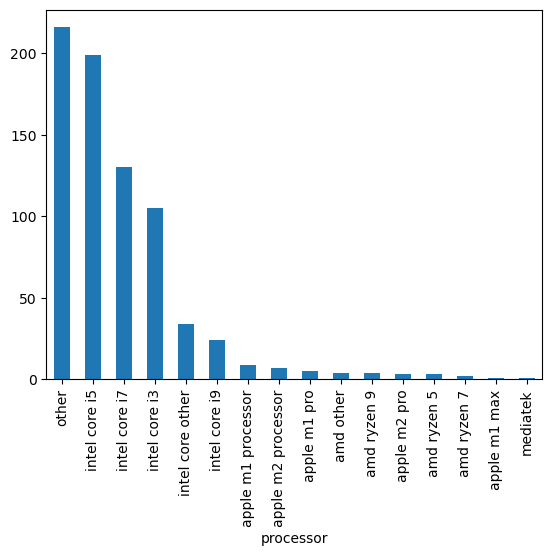

In [44]:
# counts of processor
df['processor'].value_counts().plot(kind='bar')

AMD, intel core i5, i7 are most popular processor in market 

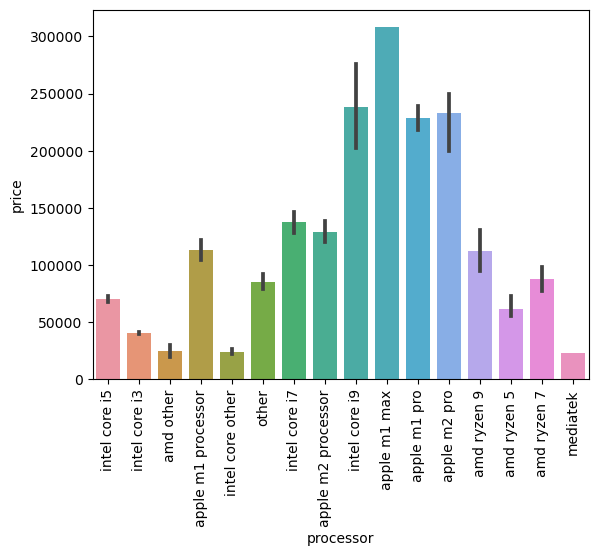

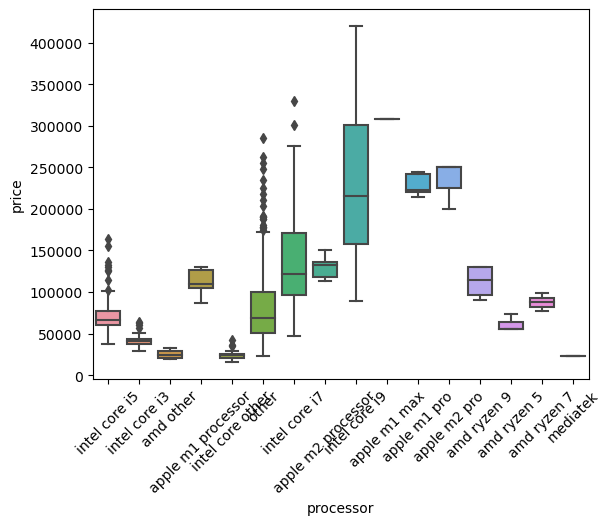

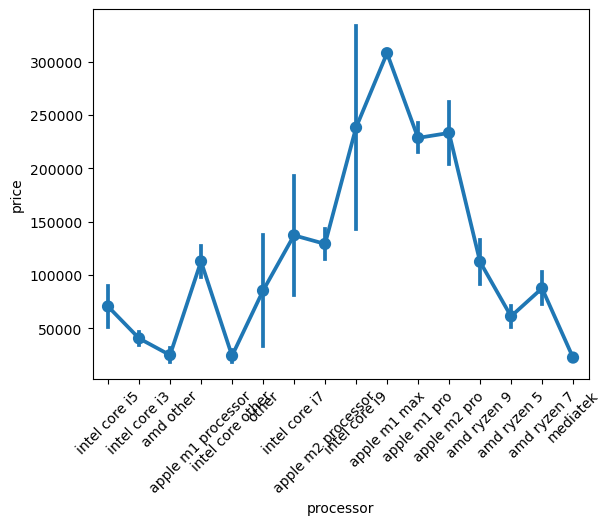

In [45]:
#checking and comparing different processor with respect to price using bar, box and point plot
sns.barplot(x=df['processor'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

sns.boxplot(data = df , x = "processor", y = "price")
plt.xticks(rotation=45)
plt.show()

sns.pointplot(data = df , x = "processor", y = "price", errorbar='sd')
plt.xticks(rotation=45)
plt.show()

apple m chips and intel core i9 are the costliest processor among all the processor 

<Axes: xlabel='ram'>

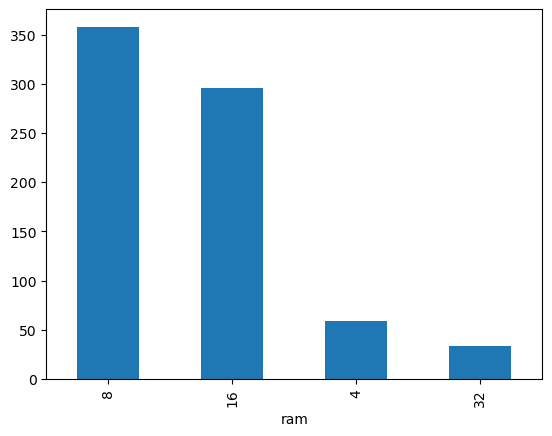

In [47]:
# counts of ram with all type storage size
df['ram'].value_counts().plot(kind='bar')

8gb and 16gb ram is mostly used in laptops

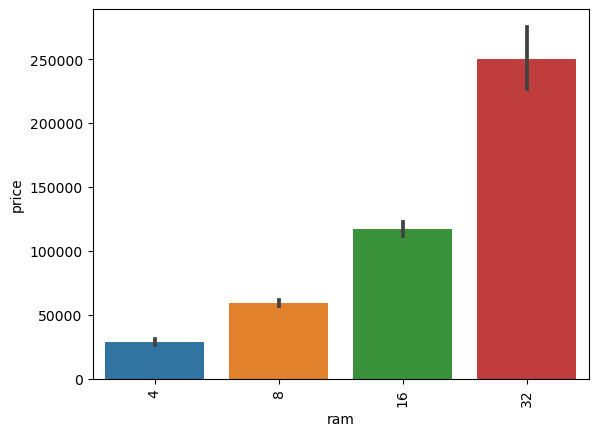

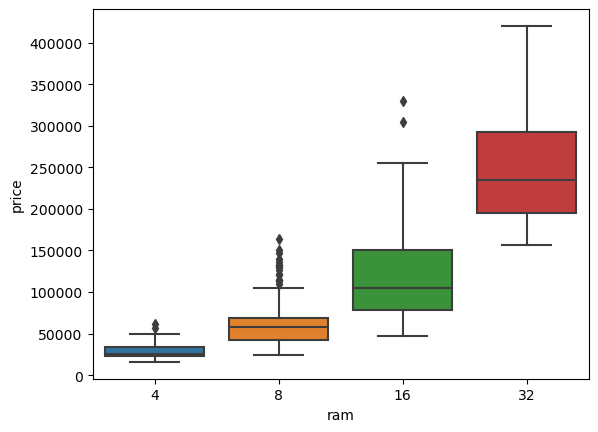

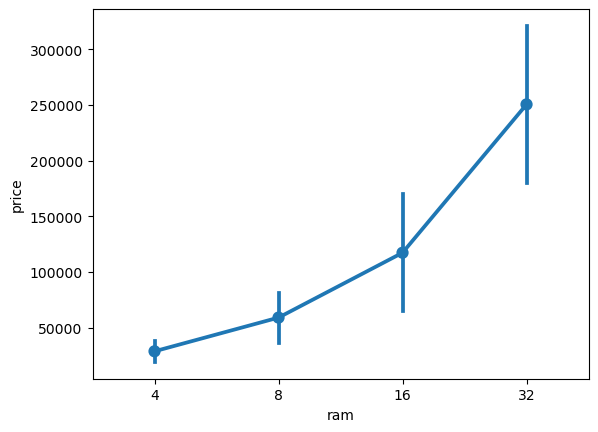

In [48]:
# which size (in gb) ram are costly 
sns.barplot(x=df['ram'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

sns.boxplot(data = df , x = "ram", y = "price")
plt.show()

sns.pointplot(data = df , x = "ram", y = "price", errorbar='sd')
plt.show()

Ram  can effect the price of the laptop <br> More ram in gb higher the price of the Laptop

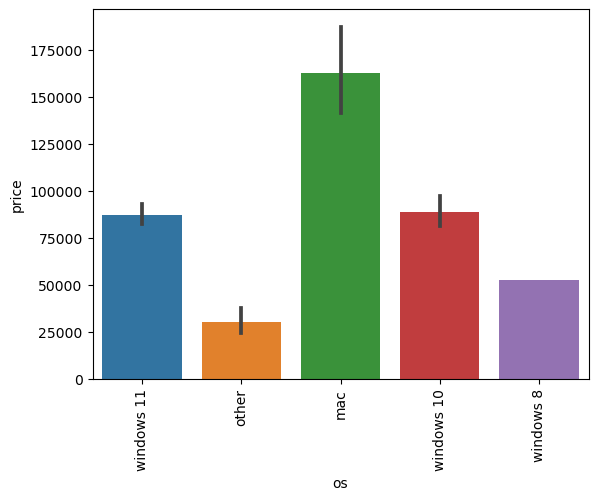

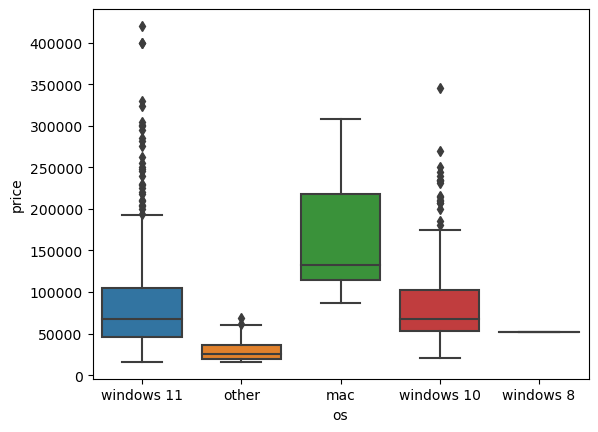

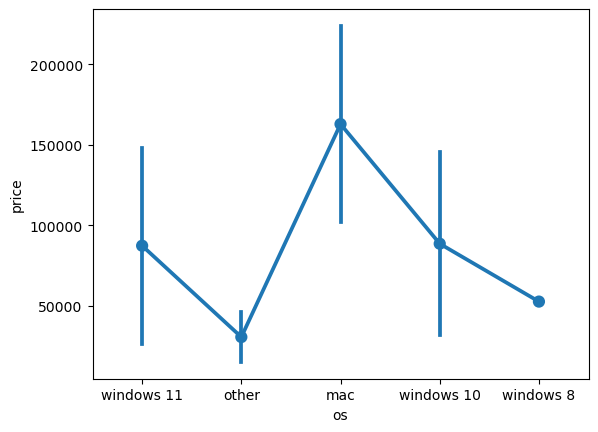

In [49]:
# comparning operating system with price range and spread
sns.barplot(x=df['os'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

sns.boxplot(data = df , x = "os", y = "price")
plt.show()

sns.pointplot(data = df , x = "os", y = "price", errorbar='sd')
plt.show()

Mac operating system is most costly operating system in the market <br>
Windows 10 and 11 are more used

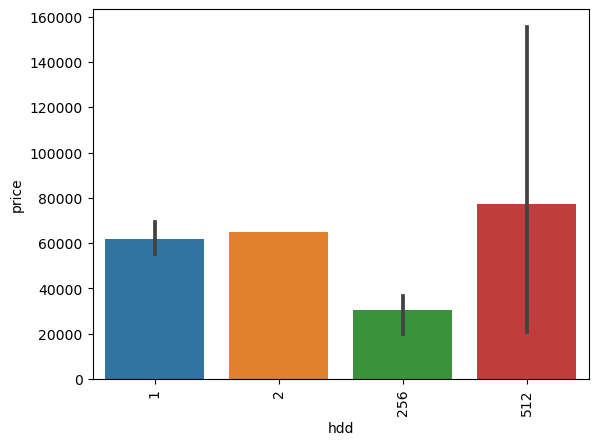

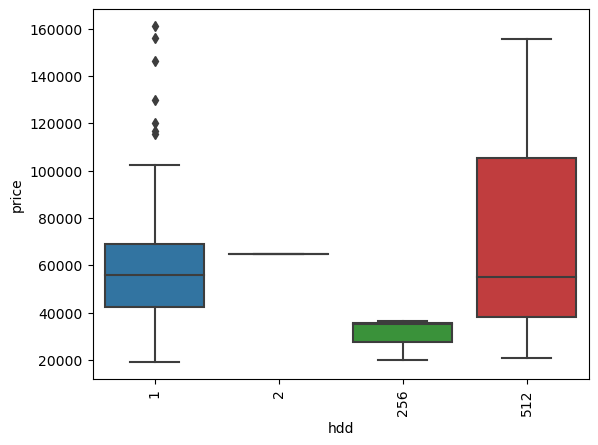

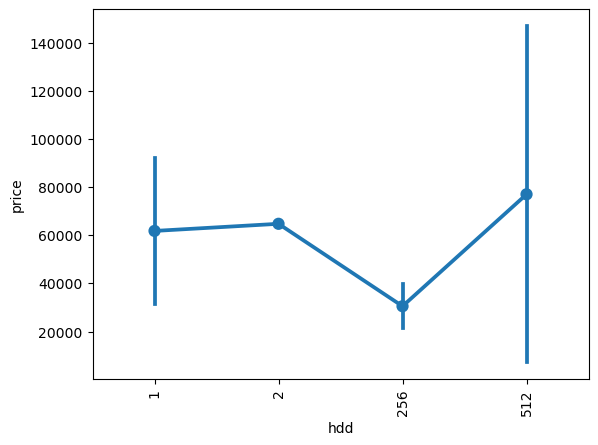

In [50]:
# checking hdd with price

# Filter rows where 'hdd' is not 0
filtered_df = df[df['hdd'] != 0]

sns.barplot(x=filtered_df['hdd'], y=filtered_df['price'])
plt.xticks(rotation='vertical')
plt.show()

sns.boxplot(data=filtered_df, x="hdd", y="price")
plt.xticks(rotation='vertical')
plt.show()

sns.pointplot(data=filtered_df, x="hdd", y="price", errorbar='sd')
plt.xticks(rotation='vertical')
plt.show()


512 gb and 1 tb are most used hdd in market <br>
Hdd dont have storng corelation with price.

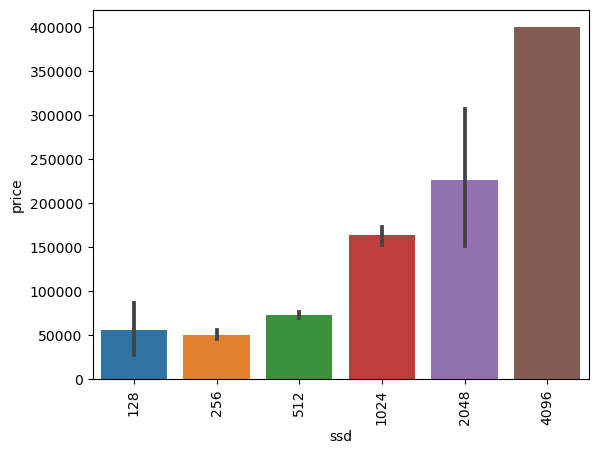

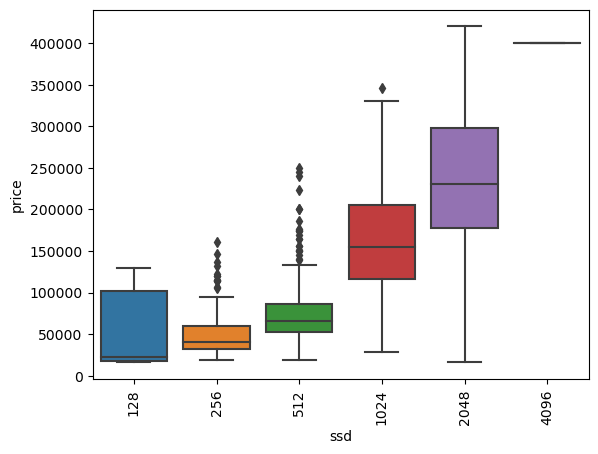

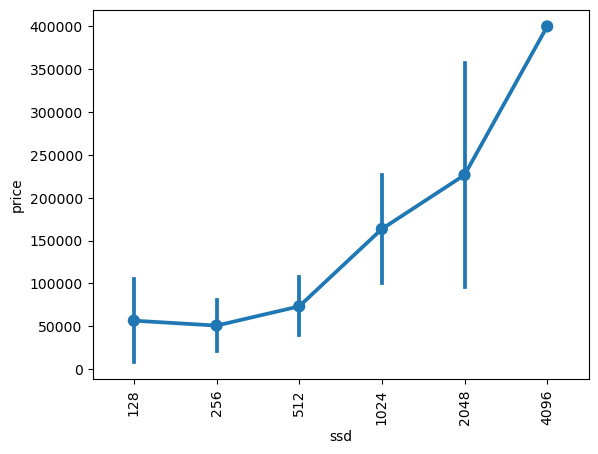

In [51]:
# checking hdd with price

# Filter rows where 'ssd' is not 0
filtered_df = df[df['ssd'] != 0]

sns.barplot(x=filtered_df['ssd'], y=filtered_df['price'])
plt.xticks(rotation='vertical')
plt.show()

sns.boxplot(data=filtered_df, x="ssd", y="price")
plt.xticks(rotation='vertical')
plt.show()

sns.pointplot(data=filtered_df, x="ssd", y="price", errorbar='sd')
plt.xticks(rotation='vertical')
plt.show()


2 TB, 1 TB and 128 GB are most used ssd <br>
Sdd can effect price.

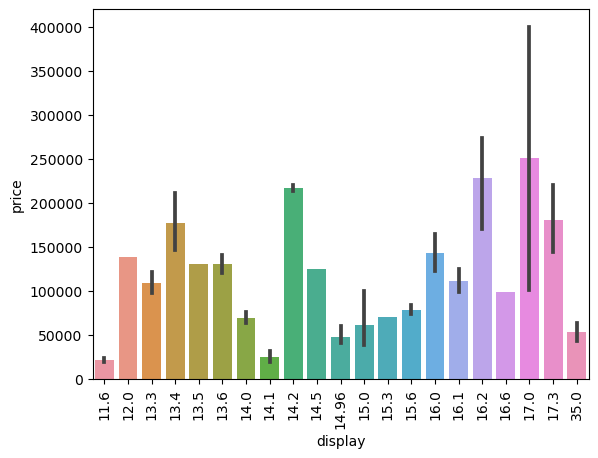

In [52]:
#comapring screen size with price
sns.barplot(x=df['display'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

There is no significant effect on price with respect to screen size like 14.5 is costly than 15.6 and 16.1

## Summary and Conclusion

This analysis explored the characteristics of various laptops available in the market. 

**Key Findings:**

* **Price Range:** Most laptops fall within the range of INR 40,000 - INR 100,000, with few exceeding INR 200,000.
* **Popular Brands:** Asus, HP, Dell, and Lenovo dominate the market, likely due to their competitive pricing and feature offerings. Alienware and Apple cater to the premium segment with higher-priced models.
* **Processors:** AMD, Intel Core i5, and i7 processors are the most prevalent, while Apple m chips and Intel Core i9 are the most expensive processor and Mediatek the least used.
* **RAM:** 8GB and 16GB configurations are most common, and RAM capacity positively impacts price. Macs, with their proprietary operating systems, command the highest price point, while Windows 10 and 11 remain mainstream choices.
* **Storage:** 512GB and 1TB HDDs are popular, with minimal price correlation. SSDs also see wide adoption, with 2TB, 1TB, and 128GB options leading the pack. SSD capacity influences price more noticeably than HDD capacity.
* **Screen Size:** No significant price variation was observed based on screen size, though 14.5-inch laptops seem slightly more expensive compared to 15.6-inch and 16.1-inch models.

**Overall:** This analysis provides valuable insights into the laptop market landscape, highlighting popular brands, price trends, and feature preferences. 

**Further Recommendations:**

* **Sentiment Analysis:** Analyze reviews and customer feedback to understand user preferences and pain points.
* **Segmentation Analysis:** Group laptops based on similar characteristics to identify potential target markets for specific brands or models.

